# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [140]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from google.colab import files
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [3]:
uploaded = files.upload()

In [77]:
os.makedirs("/content/data", exist_ok=True)
for filenamee in uploaded.keys():
  os.rename(filenamee, "/content/data/Dataset_clustering.csv")

In [78]:
clustering_df = pd.read_csv("/content/data/Dataset_clustering.csv")

In [79]:
clustering_df.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,trans_month,trans_day,trans_hour,trans_dayofweek,hours_since_last_trans,TransactionType,trans_year,Channel,CustomerOccupation,Cluster
0,14.09,70,81.0,1,5112.21,4,11,16,1,-13743.648333,Debit,2023,ATM,Doctor,2
1,376.24,68,141.0,1,13758.91,6,27,16,1,-11895.421111,Debit,2023,ATM,Doctor,2
2,126.29,19,56.0,1,1122.35,7,10,18,0,-11581.848889,Debit,2023,Online,Student,1
3,184.50,26,25.0,1,8569.06,5,5,16,4,-13167.615278,Debit,2023,Online,Student,1
4,13.45,26,198.0,1,7429.40,10,16,17,0,-9230.254167,Credit,2023,Online,Student,1


In [80]:
clustering_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TransactionAmount       2512 non-null   float64
 1   CustomerAge             2512 non-null   int64  
 2   TransactionDuration     2512 non-null   float64
 3   LoginAttempts           2512 non-null   int64  
 4   AccountBalance          2512 non-null   float64
 5   trans_month             2512 non-null   int64  
 6   trans_day               2512 non-null   int64  
 7   trans_hour              2512 non-null   int64  
 8   trans_dayofweek         2512 non-null   int64  
 9   hours_since_last_trans  2512 non-null   float64
 10  TransactionType         2512 non-null   object 
 11  trans_year              2512 non-null   int64  
 12  Channel                 2512 non-null   object 
 13  CustomerOccupation      2512 non-null   object 
 14  Cluster                 2512 non-null   

- tidak ditemukan missing value

# **3. Data Splitting**

### Data Spliting untuk model KNN

In [121]:
encoded_df = clustering_df.copy()

In [122]:
label_encoder = LabelEncoder()
cat_cols = ['TransactionType', 'Channel', 'CustomerOccupation']

for col in cat_cols :
  encoded_df[col] = label_encoder.fit_transform(encoded_df[col])

encoded_df.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,trans_month,trans_day,trans_hour,trans_dayofweek,hours_since_last_trans,TransactionType,trans_year,Channel,CustomerOccupation,Cluster
0,14.09,70,81.0,1,5112.21,4,11,16,1,-13743.648333,1,2023,0,0,2
1,376.24,68,141.0,1,13758.91,6,27,16,1,-11895.421111,1,2023,0,0,2
2,126.29,19,56.0,1,1122.35,7,10,18,0,-11581.848889,1,2023,2,3,1
3,184.50,26,25.0,1,8569.06,5,5,16,4,-13167.615278,1,2023,2,3,1
4,13.45,26,198.0,1,7429.40,10,16,17,0,-9230.254167,0,2023,2,3,1


In [123]:
processed_df = encoded_df.copy()

In [83]:
processed_df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,trans_month,trans_day,trans_hour,trans_dayofweek,hours_since_last_trans,TransactionType,trans_year,Channel,CustomerOccupation,Cluster
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.00000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966,6.56250,15.827229,16.626194,1.448248,-11699.619831,0.773885,2023.005175,0.991242,1.510350,0.931529
std,291.946243,17.792198,69.963757,0.602662,3900.942499,3.47559,8.761293,0.731059,1.511310,2553.112410,0.418398,0.071766,0.809100,1.129548,0.766228
min,0.260000,18.000000,10.000000,1.000000,101.250000,1.00000,1.000000,16.000000,0.000000,-16120.185556,0.000000,2023.000000,0.000000,0.000000,0.000000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000,3.00000,8.000000,16.000000,0.000000,-13935.794653,1.000000,2023.000000,0.000000,0.000000,0.000000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000,7.00000,16.000000,16.000000,1.000000,-11654.350833,1.000000,2023.000000,1.000000,1.500000,1.000000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000,10.00000,24.000000,17.000000,3.000000,-9469.433750,1.000000,2023.000000,2.000000,3.000000,2.000000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000,12.00000,31.000000,18.000000,4.000000,-7381.747500,1.000000,2024.000000,2.000000,3.000000,2.000000


Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [84]:
scaler = MinMaxScaler()

num_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration','LoginAttempts', 'AccountBalance', 'trans_month', 'trans_day', 'trans_hour', 'trans_dayofweek', 'hours_since_last_trans', 'trans_year']

processed_df[num_cols] = scaler.fit_transform(processed_df[num_cols])

X = processed_df.drop(columns=['Cluster'])
y = processed_df['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(2009, 14), y_train=(2009,)
Test set shape: X_test=(503, 14), y_test=(503,)


### Data Spliing untuk model Random forest


In [124]:
# menggunakan data encoded karena data
X_rf = processed_df.drop(columns=['Cluster'])
y_rf = processed_df['Cluster']

X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

print(f"Training set shape: X_rf_train={X_rf_train.shape}, y_rf_train={y_rf_train.shape}")
print(f"Test set shape: X_rf_test={X_rf_test.shape}, y_rf_test={y_rf_test.shape}")

Training set shape: X_rf_train=(2009, 14), y_rf_train=(2009,)
Test set shape: X_rf_test=(503, 14), y_rf_test=(503,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

### membangun model KNN

In [129]:
# mendeklarasi model
knn = KNeighborsClassifier(
    n_neighbors=3,
    metric='euclidean'
)

# melatih model
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

algoritma pertama yang digunakan adalah algoritma KNN  dengan parameter n_neighbors = 3. Neighbor digunakan sebagai parameter bahwa suatu titik data termasuk klasifikasi tertentu dengan melihat 3 tetangga terdekatnya. Model KNN yang digunakan juga menggunakan parameter metric dengan value 'euclidean' yang berarti menggunakan euclidean untuk mengukur jarak dengan tetangga terdekatnya

### membangun model Raandom Forest

In [132]:
# deklarasi model RF
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)

# melatih model rf
rf.fit(X_rf_train, y_rf_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)

parameter n_estimators=100 berarti bahwa model membangun 100 pohon keputusan.
parameter max_depth=10 berarti kedalaman setiap pohon akan dibatasi maksimal 10 level.
parameter mon_samples_split=5 nberarti node akan di split jika minimal terdapat 5 sampel.
parameter random_state=42 digunakan agar model dapat menghasilkan hal yang sama saat dijalankan ulang.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

### Evalluasi Model KNN

In [133]:
# prediksi menggunakan data uji
y_pred = knn.predict(X_test)

In [142]:
# menghitung metrik akurasi
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # multiclass
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')


print(f"Akurasi Model KNN: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Akurasi Model KNN: 0.7475
F1-Score: 0.7501
Precision: 0.7567
Recall: 0.7475

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.68      0.66       175
           1       0.88      0.77      0.82       200
           2       0.74      0.80      0.77       128

    accuracy                           0.75       503
   macro avg       0.75      0.75      0.75       503
weighted avg       0.76      0.75      0.75       503



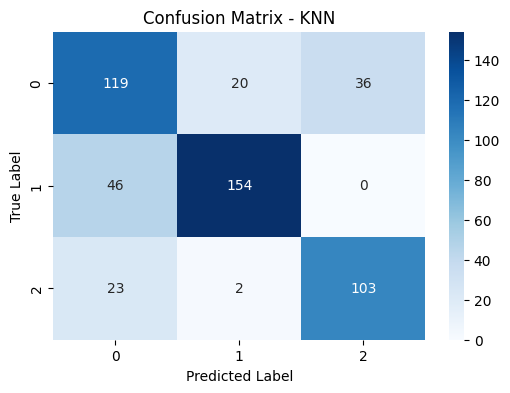

In [144]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

- berdasarkan matrix diaatas sebagian besar data telah diklasifikasikan dengan baik
- berdasarkan 502 data test sampel
- 119 data cluster 1 telah di klasifikasikan dengan benar, dan 56 lainnya diklasifikasikan dengan tidak tepat
- 154 data cluster 2 diklasifikasikan dengan benar, dan 46 lainnya tidak diklasifikasikan dengan tepat
- 103 data cluster 3 diklasifikasikan dengan benar dan 25 data lainya tidak diklasifikasikan dengan tepat


### evaluasi model Random Forest

In [147]:
# Prediksi Menggunakan Data Uji
y_rf_pred = rf.predict(X_rf_test)

In [148]:
# Menghitung metrik evaluasi
accuracy = accuracy_score(y_rf_test, y_rf_pred)
f1 = f1_score(y_rf_test, y_rf_pred, average='weighted')
precision = precision_score(y_rf_test, y_rf_pred, average='weighted')
recall = recall_score(y_rf_test, y_rf_pred, average='weighted')

print(f"Akurasi Model Random Forest: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:\n", classification_report(y_rf_test, y_rf_pred))

Akurasi Model Random Forest: 1.0000
F1-Score: 1.0000
Precision: 1.0000
Recall: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       175
           1       1.00      1.00      1.00       200
           2       1.00      1.00      1.00       128

    accuracy                           1.00       503
   macro avg       1.00      1.00      1.00       503
weighted avg       1.00      1.00      1.00       503



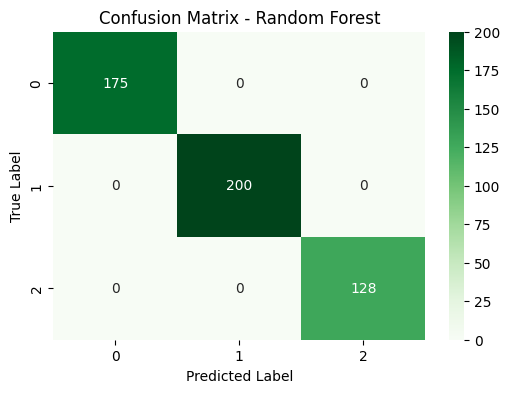

In [149]:
# Menampilkan confusion matrix
cm = confusion_matrix(y_rf_test, y_rf_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

- berdasarkan tabel Convusion matrix diaatas seluruh data telah dikelompokkan dengan benar



Berdasarkan hasil perbandingan kedua algoritma  (KNN dan Random Forest Decision) model dengan algoritma Random Forest Decision menghasilkan akurasi yang lebih tinggi atau sangat tinggi dikarenakan model ini mengambil keputusan mayoritas dari seluruh pohon keputusan (dalam kasus ini menggunakan 100 pohon)

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [150]:
# tunning untuk model KNN karena akurasi belum maksimal
param_grid = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

In [151]:
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [152]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
Best Cross-Validation Accuracy: 0.7944281088323966


In [154]:
# deklarasi model baru
best_knn = grid_search.best_estimator_

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [157]:
# prediksi data test
y_best_pred = best_knn.predict(X_test)


In [158]:
# menampilkan metrik evaluasi
accuracy = accuracy_score(y_test, y_best_pred)
f1 = f1_score(y_test, y_best_pred, average='weighted')
precision = precision_score(y_test, y_best_pred, average='weighted')
recall = recall_score(y_test, y_best_pred, average='weighted')

print("Evaluasi Model KNN dengan Hyperparameter Terbaik:")
print(f"Akurasi: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_best_pred))

Evaluasi Model KNN dengan Hyperparameter Terbaik:
Akurasi: 0.7714
F1-Score: 0.7732
Precision: 0.7811
Recall: 0.7714

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.69      0.69       175
           1       0.91      0.80      0.85       200
           2       0.71      0.85      0.78       128

    accuracy                           0.77       503
   macro avg       0.77      0.78      0.77       503
weighted avg       0.78      0.77      0.77       503



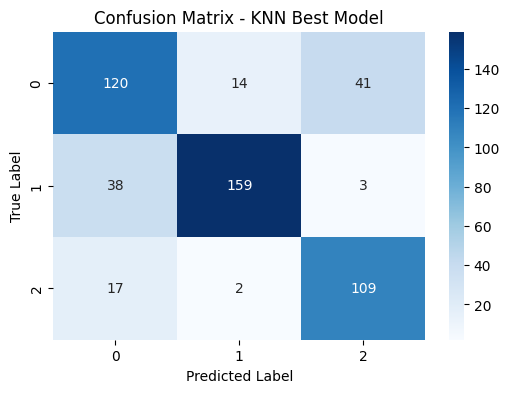

In [159]:
cm = confusion_matrix(y_test, y_best_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - KNN Best Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

- berdasarkan tabel metrix yang telah ditampilkan, terdapat peningkatan akurasi model namun tidak signifikan
- berdasarkan 502 data test sampel
- 120 data cluster 1 telah di klasifikasikan dengan benar (naik 1), dan 565lainnya diklasifikasikan dengan tidak tepat.
- 159 data cluster 2 diklasifikasikan dengan benar (naik 5), dan 41 lainnya tidak diklasifikasikan dengan tepat
- 109 data cluster 3 diklasifikasikan dengan benar (Naik 6) dan 19 data lainya tidak diklasifikasikan dengan tepat


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

EVALUASI MODEL KNN

1. Evaluasi khusus model
   - Akurasi naik dari 74.75% → 77.14%
   - F1-Score naik dari 0.7501 → 0.7732
2. Identifikasi model
   - Precision dan Recall kelas 0 masih rendah (69%) untuk kelas KNN
   - Gap antara kelas 1 dan kelas 0 cukup besar. Kelas 1 punya precision & recall tinggi (91% & 80%), sedangkan kelas 0 masih rendah.
   - Data kelas 0 mungkin kurang representatif atau memiliki pola yang sulit ditangkap oleh KNN.
   - KNN sensitif terhadap distribusi data, outlier, dan skala fitur. distribusi data transaksi cenderung skewness pada beberapa data
3. Tindak lanjut
   - mencoba feature scaling yang lebih optimal

EVALUASI MODEL Random Forest Decision

1. Evaluasi khusus model
   - Akurasi sangat tinggi (100%)
   - recall  f1-score   support juga sangat tinggi (100%)
2. Identifikasi model
   - kemungkinan besar model terlalu kompleks dan mengalami overfitting
   - perlu di cek ulang
3. Tindak Lanjut
   - cek hasil evaluasi dengan Cross-Validation untuk memastikan tidak overfitting
   - kurangi kompleksitas model